In [1]:
import numpy as np     #只需要下载numpy库即可
import GridWorld_v2

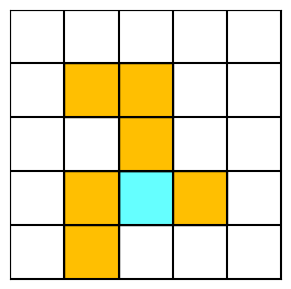

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v2.GridWorld_v2(forbidden_area_score=-1, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()

In [3]:
class ValueIteration:
    def __init__(self, env, theta, gamma):
        self.env = env
        self.theta = theta
        self.gamma = gamma
        self.v = np.zeros((env.rows, env.columns))
        # //初始化策略
        self.pi = np.zeros((env.rows, env.columns))

    def value_iteration(self):
        while True:
            new_v = np.zeros((rows, columns))
            max_diff = 0
            for i in range(rows):
                for j in range(columns):
                    qsa_list = []
                    for a in range(5):
                        next_state, reward, done = self.env.step([i, j], a)
                        qsa = reward + self.gamma * self.v[next_state[0], next_state[1]]
                        qsa_list.append(qsa)
                    # 这里是唯一的区别,因为每个的概率相同，所以直接求和再除以5
                    new_v[i][j] = np.sum(qsa_list) / 5 
                    max_diff = max(max_diff, abs(new_v[i][j] - self.v[i][j]))

            self.v = new_v
            if max_diff < self.theta:
                break

        self.get_policy()
        
    def get_policy(self):
        for i in range(rows):
            for j in range(columns):
                qsa_list = []
                for a in range(5):
                    next_state, reward, done = self.env.step([i, j], a)
                    qsa = reward + self.gamma * self.v[next_state[0], next_state[1]]
                    qsa_list.append(qsa)
                self.pi[i][j] = np.argmax(qsa_list)


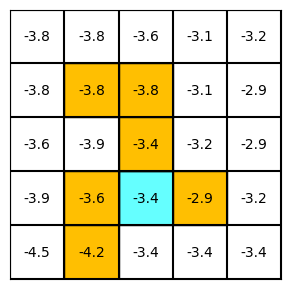

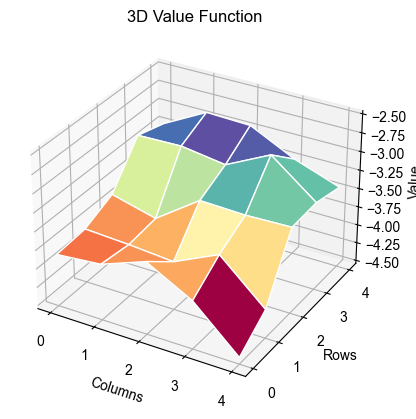

In [4]:
theta = 0.001
gamma = 0.9
agent = ValueIteration(gridworld, theta, gamma)
agent.value_iteration()
# gridworld.show_policy(agent.pi)
gridworld.show_value(agent.v)
gridworld.show_value3D(agent.v)